In [1]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import veloxchem as vlx


In [2]:
# create a series of molecule objects with different dihedral angles from 0 to 180 degrees
molecules = []
angles = np.linspace(-30, 30, 61)
for i in range(len(angles)):
    molecule = vlx.Molecule.read_smiles('C=C')
    molecule.set_dihedral_in_degrees([4,1,2,6], angles[i])
    molecules.append(molecule)

# compute the RPA excitation energies for each molecule
rpa_results = []
for molecule in molecules:
    scf_drv = vlx.ScfRestrictedDriver()
    scf_drv.xcfun = 'cam-b3lyp'
    basis = vlx.MolecularBasis.read(molecule, 'def2-svp')
    scf_results = scf_drv.compute(molecule, basis)
    rpa_solver = vlx.lreigensolver.LinearResponseEigenSolver()
    rpa_solver.nstates = 2
    rpa_results.append(rpa_solver.compute(molecule, basis, scf_results))



                                                                                                                          
                                            Self Consistent Field Driver Setup                                            
                                                                                                                          
                   Wave Function Model             : Spin-Restricted Kohn-Sham                                            
                   Initial Guess Model             : Superposition of Atomic Densities                                    
                   Convergence Accelerator         : Two Level Direct Inversion of Iterative Subspace                     
                   Max. Number of Iterations       : 50                                                                   
                   Max. Number of Error Vectors    : 10                                                                   
                

/tmp/ipykernel_27593/1477366335.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('coolwarm', len(rpa_results))(np.linspace(0, 1, len(rpa_results)))


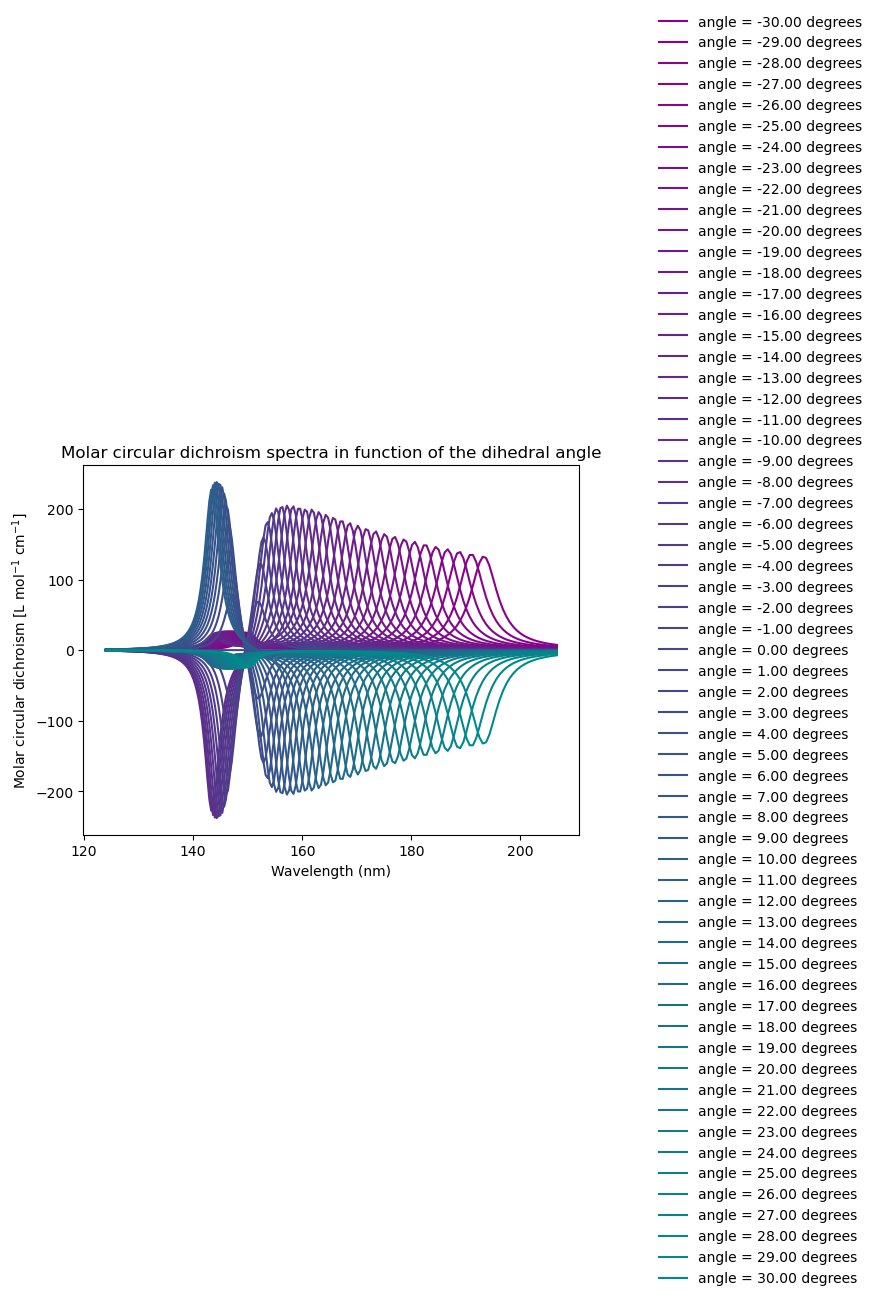

In [3]:
x_data = np.linspace(6,10, 200)
x_data_nm = 1240 / x_data

fig, ax = plt.subplots()
colors = plt.cm.coolwarm(np.linspace(0, 1, len(rpa_results)))

colors = plt.cm.get_cmap('coolwarm', len(rpa_results))(np.linspace(0, 1, len(rpa_results)))
colors = [plt.cm.colors.to_rgba(c) for c in plt.cm.colors.LinearSegmentedColormap.from_list('custom', ['darkmagenta', 'darkcyan'])(np.linspace(0, 1, len(rpa_results)))]

for idx, (rpa_result, color) in enumerate(zip(rpa_results, colors)):
    spectra = rpa_solver.get_ecd_spectrum(rpa_result, x_data, x_unit='ev', b_unit='ev', b_value=0.1)
    ax.plot(x_data_nm, spectra['y_data'], color=color, label=f'angle = {angles[idx]:.2f} degrees')

plt.title('Molar circular dichroism spectra in function of the dihedral angle')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Molar circular dichroism [L mol$^{-1}$ cm$^{-1}$]')
plt.legend(frameon=False, borderaxespad=0., loc='center left', bbox_to_anchor=(1.15, 0.5))